# <center> MVO and BL Empirical Examples </center>

&copy;2023 Kaiwen Zhou

# Sample Data

We introduce the example used in the paper by He and Litterman (2002) regarding the international equity market to better illustrate our point.

Data has been provided for index volatility, equilibrium portfolio weight, and implied returns. The weighting is based on the market capitalization of each market, and the expected returns are implied by the market prices.

Additionally, we provide the covariance matrix for this dataset.

## Import Libraries and Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [4]:
# Get Market Data
marktet_data = pd.read_csv('MarketData.csv')

# Get Covariance Matrix
covariance_matrix = pd.read_csv('Covariance.csv')
covariance_matrix = covariance_matrix.set_index('Cov')

## Have a look

In [5]:
marktet_data

,Country,Equity Index Volatility(%),Equilibrium Portfolio Weight (%),Equilibrium Expected Return (%)
0,Australia,16.0,1.6,3.9
1,Canada,20.3,2.2,6.9
2,France,24.8,5.2,8.4
3,Germany,27.1,5.5,9.0
4,Japan,21.0,11.6,4.3
5,UK,20.0,12.4,6.8
6,USA,18.7,61.5,7.6


In [6]:
covariance_matrix

,AUS,CAN,FRA,GER,JAP,UK,USA
Cov,,,,,,,
AUS,0.025600,0.015850,0.018967,0.022330,0.014750,0.016384,0.014691
CAN,0.015850,0.041209,0.033428,0.036034,0.027923,0.024685,0.024751
FRA,0.018967,0.033428,0.061504,0.057866,0.018488,0.038837,0.030979
GER,0.022330,0.036034,0.057866,0.073441,0.020146,0.042113,0.033092
JAP,0.014750,0.013215,0.018488,0.020146,0.044100,0.017010,0.012017
UK,0.016384,0.024685,0.038837,0.042113,0.017010,0.040000,0.024385
USA,0.014691,0.029572,0.030979,0.033092,0.012017,0.024385,0.034969


## Check Data Types

In [7]:
marktet_data.dtypes, covariance_matrix.dtypes

(Country                              object
 Equity Index Volatility(%)          float64
 Equilibrium Portfolio Weight (%)    float64
 Equilibrium Expected Return (%)     float64
 dtype: object,
  AUS     float64
  CAN     float64
  FRA     float64
  GER     float64
  JAP     float64
  UK      float64
  USA     float64
 dtype: object)

# Mean-Variance Optimization

## Prepare Useful Variables

### 1. Get 
- the expected return vector $\boldsymbol{\mu}$, 
- the covariance matrix $\mathbf{\Sigma}$, 
- and the auxiliary vector $\boldsymbol{e}$.

In [8]:
N = marktet_data.shape[0]

μ = np.array(marktet_data['Equilibrium Expected Return (%)'], copy=True)/100
Σ = np.array(covariance_matrix[covariance_matrix.columns], copy=True)
Σ[1,4]=0.01322
Σ_inverse = np.linalg.inv(Σ)
e = np.ones(N)
r_f = 2/100
μ, Σ, Σ_inverse, e

(array([0.039, 0.069, 0.084, 0.09 , 0.043, 0.068, 0.076]),
 array([[0.0256  , 0.01585 , 0.018967, 0.02233 , 0.01475 , 0.016384,
         0.014691],
        [0.01585 , 0.041209, 0.033428, 0.036034, 0.01322 , 0.024685,
         0.024751],
        [0.018967, 0.033428, 0.061504, 0.057866, 0.018488, 0.038837,
         0.030979],
        [0.02233 , 0.036034, 0.057866, 0.073441, 0.020146, 0.042113,
         0.033092],
        [0.01475 , 0.013215, 0.018488, 0.020146, 0.0441  , 0.01701 ,
         0.012017],
        [0.016384, 0.024685, 0.038837, 0.042113, 0.01701 , 0.04    ,
         0.024385],
        [0.014691, 0.029572, 0.030979, 0.033092, 0.012017, 0.024385,
         0.034969]]),
 array([[ 63.65585446,  -5.72671809,   3.68012742,  -7.9047993 ,
         -12.30607657,  -6.7417562 ,  -9.53894479],
        [ -8.92469925,  58.03794636, -10.82592435,  -7.20098218,
          -0.52404122,  -2.08620632, -19.28976225],
        [  3.73423021,  -7.29851282,  76.09818723, -39.81748222,
          -1.4494

### 2. Get 
- $A=\boldsymbol{e}^{\top}\mathbf{\Sigma}^{-1} \boldsymbol{e}$, 
- $B=\boldsymbol{e}^{\top}\mathbf{\Sigma}^{-1}\boldsymbol{\mu}=\boldsymbol{\mu}^{\top} \mathbf{\Sigma}^{-1}\boldsymbol{e}$, 
- $C=\boldsymbol{\mu}^{\top} \mathbf{\Sigma}^{-1}\boldsymbol{\mu}$,
- $\Delta = AC-B^2$.

In [9]:
A = e@Σ_inverse@e
B = e@Σ_inverse@μ
C = μ@Σ_inverse@μ
Δ = A*C - B**2
A,B,C,Δ

(53.974738770711085,
 2.5357633803908146,
 0.17998461072270325,
 3.284526425174982)

### 3. Get optimal portfolio weights $\boldsymbol{w}^*$ under MVO

In [10]:
def MVO(μ, Σ, μ_p):
    # number of securities
    N = Σ.shape[0]
    
    # Basic Ingredients
    e = np.ones(N) # auxiliary vector
    Σ_inverse = np.linalg.inv(Σ) # inverse of the covariance matrix Σ
    A = e@Σ_inverse@e
    B = e@Σ_inverse@μ
    C = μ@Σ_inverse@μ
    Δ = A*C - B**2
    
    # optimal Lagrange Multipliers
    λ_star = (C - B*μ_p)/Δ
    γ_star = (μ_p*A - B)/Δ
    
    # mean-variance efficient portfolio weights
    w_star = λ_star*Σ_inverse@e + γ_star*Σ_inverse@μ
    
    # the volatility of the optimal portfolio
    σ_p_star = np.sqrt(w_star@Σ@w_star)
    
    return w_star, σ_p_star

In [11]:
def weight_to_return_and_volatility(weights):
    μ_w = weights@μ
    σ_w = np.sqrt(weights@Σ@weights)
    return μ_w, σ_w

## Efficient Frontier (Risky Asset Only)

Get the relationship between
- the expected return of the optimal portfolio $\mu_p$
- the variance of the corresponding optimal portfolio $\sigma_p^{*^2}$
by $$\sigma_{p}^{*^2}=\frac{A \mu_{p}^{2}-2 B \mu_{p}+C}{\Delta}$$

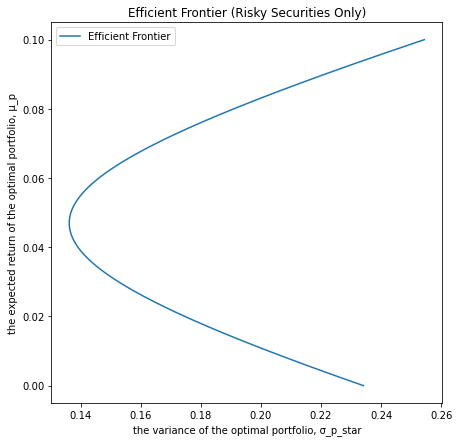

In [97]:
# Efficient Frontier
μ_p = np.linspace(0, 0.1, 10000)
σ_p_star = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star, μ_p, label='Efficient Frontier')
# plt.plot(σ_p_star**2, μ_p, label='Efficient Frontier1')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.title('Efficient Frontier (Risky Securities Only)')
plt.legend()
plt.show()

##

## Global Minimum Variance Portfolio

The weights for the Global Minimum Variance Portfolio is $$
\boldsymbol{w}_{gmv}^{*} =\frac{\mathbf{\Sigma}^{-1} \boldsymbol{e}}{\boldsymbol{e}^{\top} \mathbf{\Sigma}^{-1} \boldsymbol{e}}
$$

In [13]:
weights_gmv = Σ_inverse@e/(e@Σ_inverse@e)
return_gmv, volatility_gmv = weight_to_return_and_volatility(weights_gmv)

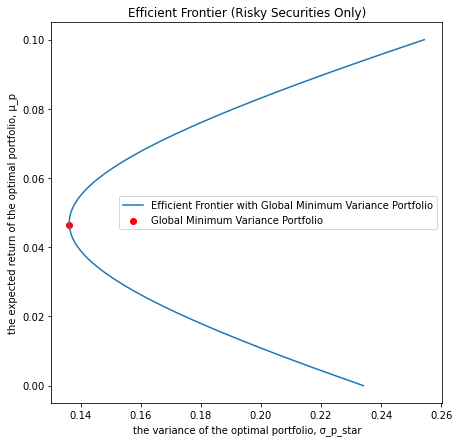

In [14]:
# Efficient Frontier
μ_p = np.linspace(0, 0.1, 10000)
σ_p_star = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star, μ_p, label='Efficient Frontier with Global Minimum Variance Portfolio')

# Global Minimum Variance Portfolio
plt.scatter(volatility_gmv, return_gmv, color='r', label='Global Minimum Variance Portfolio')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.title('Efficient Frontier (Risky Securities Only)')
plt.legend()
plt.show()

## Two Funds Separation Theorem

The portfolio other than the Global Minimum Variance Portfolio is 
$$
\boldsymbol{w}^*_d=\frac{\mathbf{\Sigma}^{-1} \boldsymbol{\mu}}{\boldsymbol{e}^{\top} \mathbf{\Sigma}^{-1} \boldsymbol{\mu}}
$$

In [15]:
weights_d = Σ_inverse@μ/(e@Σ_inverse@μ)
return_d, volatility_d = weight_to_return_and_volatility(weights_d)

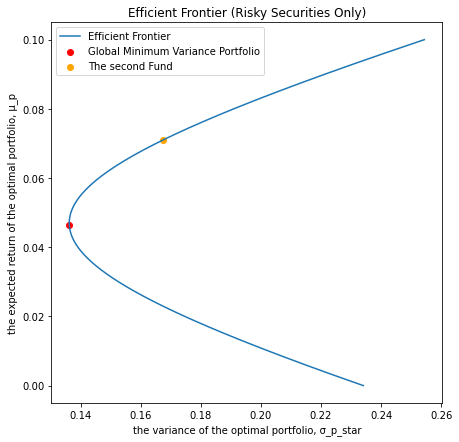

In [16]:
# Efficient Frontier
μ_p = np.linspace(0, 0.1, 10000)
σ_p_star = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star, μ_p, label='Efficient Frontier')
plt.scatter(volatility_gmv, return_gmv, color='r', label='Global Minimum Variance Portfolio')

plt.scatter(volatility_d, return_d, color='orange', label='The second Fund')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.title('Efficient Frontier (Risky Securities Only)')
plt.legend()
plt.show()

## MVO with rik-free asset

### Capital Market Line (CML)

We have
$$
\begin{cases}
    \mu_{p}&=r_{f}+\gamma^{*}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)^{\top} \mathbf{\Sigma}^{-1}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)\\
\sigma_{p}^{*}&=\gamma^{*}\sqrt{\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)^{\top} \mathbf{\Sigma}^{-1}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)}
\end{cases}
$$
where 
$$
\gamma^*=\frac{\mu_p-r_{f}}{\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)^{\top} \mathbf{\Sigma}^{-1}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)}
$$

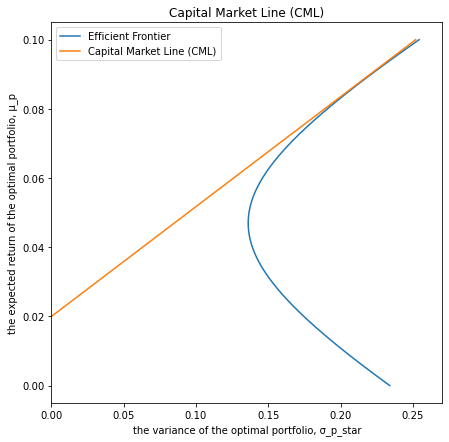

In [17]:
# Capital Market Line (CML)
r_f = 2/100
μ_p = np.linspace(0, 0.1, 10000)
γ_star = (μ_p-r_f)/((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_cml = γ_star*np.sqrt((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_ef = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star_ef, μ_p, label='Efficient Frontier')
plt.plot(σ_p_star_cml, μ_p, label='Capital Market Line (CML)')
# plt.scatter(volatility_gmv, return_gmv, color='r', label='Global Minimum Variance Portfolio')

# plt.scatter(volatility_d, return_d, color='orange', label='The second Fund')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.xlim(0)
plt.title('Capital Market Line (CML)')
plt.legend()
plt.show()

### Tangency Portfolio

We have 
$$
\boldsymbol{w}_{Tang}=\frac{1}{\boldsymbol{e}^{\top} \mathbf{\Sigma}^{-1}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right)} \cdot \mathbf{\Sigma}^{-1}\left(\boldsymbol{\mu}-r_{f} \boldsymbol{e}\right).
$$

In [18]:
# weigthts for the tangency portfolio
weights_tangency = Σ_inverse@(μ-r_f*e)/(e@Σ_inverse@(μ-r_f*e))
return_tangency, volatility_tangency = weight_to_return_and_volatility(weights_tangency)

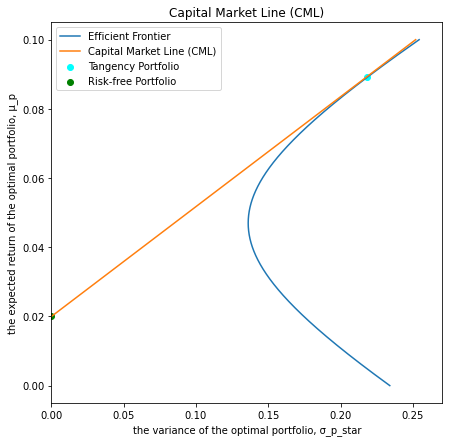

In [19]:
# Capital Market Line (CML)
r_f = 2/100
μ_p = np.linspace(0, 0.1, 10000)
γ_star = (μ_p-r_f)/((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_cml = γ_star*np.sqrt((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_ef = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star_ef, μ_p, label='Efficient Frontier')
plt.plot(σ_p_star_cml, μ_p, label='Capital Market Line (CML)')
# plt.scatter(volatility_gmv, return_gmv, color='r', label='Global Minimum Variance Portfolio')

# plt.scatter(volatility_d, return_d, color='orange', label='The second Fund')
plt.scatter(volatility_tangency, return_tangency, color='cyan', label='Tangency Portfolio')
plt.scatter(0, r_f, color='green', label='Risk-free Portfolio')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.xlim(0)
plt.title('Capital Market Line (CML)')
plt.legend()
plt.show()

## All in One

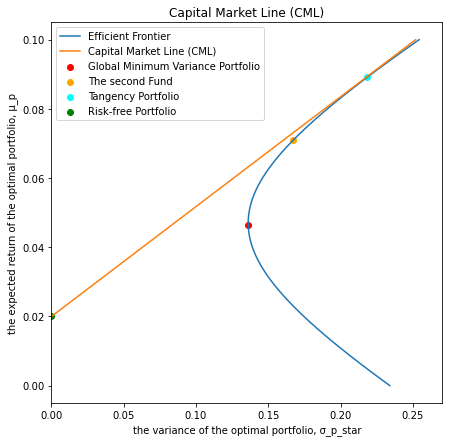

In [20]:
# Capital Market Line (CML)
r_f = 2/100
μ_p = np.linspace(0, 0.1, 10000)
γ_star = (μ_p-r_f)/((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_cml = γ_star*np.sqrt((μ-r_f*e)@Σ_inverse@(μ-r_f*e))
σ_p_star_ef = np.sqrt((A*μ_p**2-2*B*μ_p+C)/Δ)

plt.figure(figsize=(7,7))
plt.plot(σ_p_star_ef, μ_p, label='Efficient Frontier')
plt.plot(σ_p_star_cml, μ_p, label='Capital Market Line (CML)')
plt.scatter(volatility_gmv, return_gmv, color='r', label='Global Minimum Variance Portfolio')

plt.scatter(volatility_d, return_d, color='orange', label='The second Fund')
plt.scatter(volatility_tangency, return_tangency, color='cyan', label='Tangency Portfolio')
plt.scatter(0, r_f, color='green', label='Risk-free Portfolio')
plt.xlabel('the variance of the optimal portfolio, σ_p_star')
plt.ylabel('the expected return of the optimal portfolio, μ_p')
plt.xlim(0)
plt.title('Capital Market Line (CML)')
plt.legend()
plt.show()

## Drawbacks of MVO

Suppose the expected returns for all countries for the next years are 5%. Then, according to the classical MVO framework, the portfolio weights must be as follows:

In [21]:
# 
μ = np.ones(7)*0.05
risk_aversion_coef = 2.5
weights_optimal_MVO = np.linalg.inv(risk_aversion_coef*Σ)@μ

Since expected returns are difficult to predict, let's consider what would happen if our views were to shift slightly. Suppose the expected return for Germany changes to 7%, while those for France and the UK both change to 4%. According to the classical MVO framework, the optimal portfolio weights are:

[ 0.50235374  0.18372662 -0.02163891 -0.24627869  0.19845493  0.24227304
  0.22060405]
[ 0.45136186  0.17776728 -0.55590651  0.47726002  0.23772982 -0.13031363
  0.2819911 ]


<AxesSubplot:>

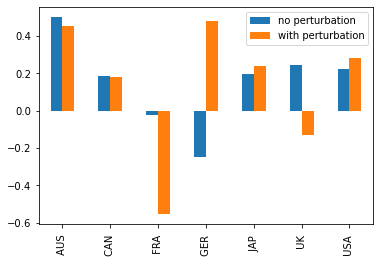

In [22]:
# Add a bit perturbation to the expeceted returns
μ_perturbated = μ
μ_perturbated[3]=μ_perturbated[3]+0.02
μ_perturbated[2]=μ_perturbated[2]-0.01
μ_perturbated[5]=μ_perturbated[5]-0.01
weights_optimal_MVO_perturbated = np.linalg.inv(risk_aversion_coef*Σ)@μ_perturbated

# PLOT
print(weights_optimal_MVO)
print(weights_optimal_MVO_perturbated)
df = pd.DataFrame(np.c_[weights_optimal_MVO,weights_optimal_MVO_perturbated], index=covariance_matrix.columns, columns=['no perturbation', "with perturbation"])
df.plot.bar()

## Black-Litterman Model

In [23]:
# Market Portfolio
μ_eq = np.array(marktet_data['Equilibrium Expected Return (%)'], copy=True)/100
μ_eq = μ_eq.reshape(-1,1)

# market portfolio weights given by MVO framework
risk_aversion_coef = 2.5
w_eq = np.linalg.inv(risk_aversion_coef*Σ)@μ_eq
w_eq

array([[-0.01097079],
       [ 0.1874685 ],
       [ 0.04287915],
       [ 0.02364488],
       [ 0.11429539],
       [ 0.1361645 ],
       [ 0.52082372]])

### BL Step:

We use the market portfolio as the benchmark, and then suppose we have the view that 
- German market will outperform the French market by 20%
- German market will outperform the UK market by 20%
Therefore, by our Black-Litterman construction, we have the pick matrix, view matrix and residual as
$$
\mathbf{P} = \begin{bmatrix}
0 & 0 & -1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & -1 & 0 
\end{bmatrix}, 
\boldsymbol{q}=\begin{bmatrix}
20\%\\
20\%
\end{bmatrix}, \boldsymbol{\epsilon} \sim \mathcal{N}(\boldsymbol{0},\mathbf{\Omega}), \mathbf{\Omega} = \begin{bmatrix}
0.04 & 0\\
0 & 0.04
\end{bmatrix}
$$

In [24]:
P = np.zeros((2,7))
P[0,2]=-1
P[0,3]=1
P[1,3]=1
P[1,5]=-1

q=np.ones((2,1))*0.2

Ω=np.zeros((2,2))
Ω[0,0]=0.04
Ω[1,1]=0.04

τ=0.01

In [25]:
# Calculate the BL expeceted returns and its variance
μ_BL=np.linalg.inv(np.linalg.inv(τ*Σ)+P.T@np.linalg.inv(Ω)@P)@(np.linalg.inv(τ*Σ)@μ_eq+P.T@np.linalg.inv(Ω)@q)
Σ_BL=np.linalg.inv(np.linalg.inv(τ*Σ)+P.T@np.linalg.inv(Ω)@P)

# Calculate the expeceted return of r and the variance of r
expected_r = μ_BL
variance_r = Σ_BL+Σ

### MVO Step:

<AxesSubplot:>

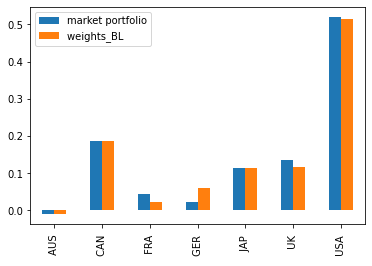

In [26]:
# Plug these into the classical MVO framework, we get
risk_aversion_coef = 2.5
weights_BL = np.linalg.inv(risk_aversion_coef*variance_r)@expected_r

# PLOT
df = pd.DataFrame(np.c_[w_eq,weights_BL], index=covariance_matrix.columns, columns=['market portfolio', "weights_BL "])
df.plot.bar()